In [122]:
from dataLoader import CustomDataset
from torch.utils.data import DataLoader
import get_data
from get_data import Get_Data
import torch
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import importlib
from sklearn.model_selection import KFold

In [123]:
importlib.reload(get_data)

<module 'get_data' from '/home/popo/Sem/Model/get_data.py'>

In [124]:
key_points_path_train, key_points_path_test = Get_Data().patient_level_split()

In [139]:
X_train, y_train = Get_Data().json_to_data(key_points_path_train, 512, 512)

In [140]:
transform = A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.3),
        A.RandomBrightnessContrast(p=0.3)
        ],
        keypoint_params=A.KeypointParams(format='xy', remove_invisible=False),
    )

In [141]:
#k-fold split
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf.get_n_splits(X_train)

5

In [143]:
for train_idx, val_idx in kf.split(X_train):
    #split the data
    X_train_fold = [X_train[i] for i in train_idx]
    y_train_fold = [y_train[i] for i in train_idx]
    X_val_fold = [X_train[i] for i in val_idx]
    y_val_fold = [y_train[i] for i in val_idx]

    #create the dataloader
    train_dataset = CustomDataset(X_train_fold, y_train_fold, transform=transform)
    val_dataset = CustomDataset(X_val_fold, y_val_fold, transform = transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=True)

    for i, (imgs, labels) in enumerate(train_loader):
        imgs = imgs.to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
        labels = labels.view(-1, 8).to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
        print(imgs.shape)
        print(labels.shape)
        break


    

torch.Size([16, 1, 512, 512])
torch.Size([16, 8])
torch.Size([16, 1, 512, 512])
torch.Size([16, 8])
torch.Size([16, 1, 512, 512])
torch.Size([16, 8])
torch.Size([16, 1, 512, 512])
torch.Size([16, 8])
torch.Size([16, 1, 512, 512])
torch.Size([16, 8])


torch.Size([16, 1, 512, 512])
torch.Size([16, 4, 2])


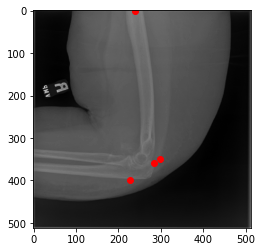

In [105]:
for i, (images, labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    plt.imshow(images[0,0,:,:], cmap = 'gray')
    plt.scatter(labels[0,:,0], labels[0,:,1], color = 'red')
    plt.show()
    break

In [106]:
item = iter(train_dataset)

In [107]:
img, lab = next(item)

In [108]:
lab.shape

torch.Size([4, 2])

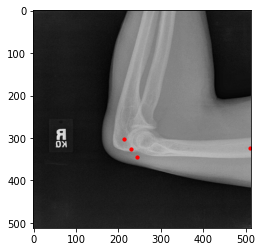

In [109]:
plt.imshow(img.squeeze().numpy(), cmap = 'gray')
plt.scatter(lab[:,0], lab[:,1], s=10, c='r')